In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
customer_transactions = transactions.groupby("CustomerID").agg({
    "TransactionID": "count",      
    "TotalValue": "sum",           
    "Price": "mean"                
}).reset_index()

In [7]:
customer_transactions.rename(columns={"TransactionID": "TransactionCount", "Price": "AvgTransactionValue"}, inplace=True)
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left")
customer_data.fillna({"TransactionCount": 0, "TotalValue": 0, "AvgTransactionValue": 0}, inplace=True)
customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)
features = customer_data.drop(columns=["CustomerID", "CustomerName", "SignupDate"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, random_state=42)  
labels = kmeans.fit_predict(scaled_features)
customer_data["Cluster"] = labels
db_index = davies_bouldin_score(scaled_features, labels)
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.1191190094053909
Silhouette Score: 0.3589651380766382


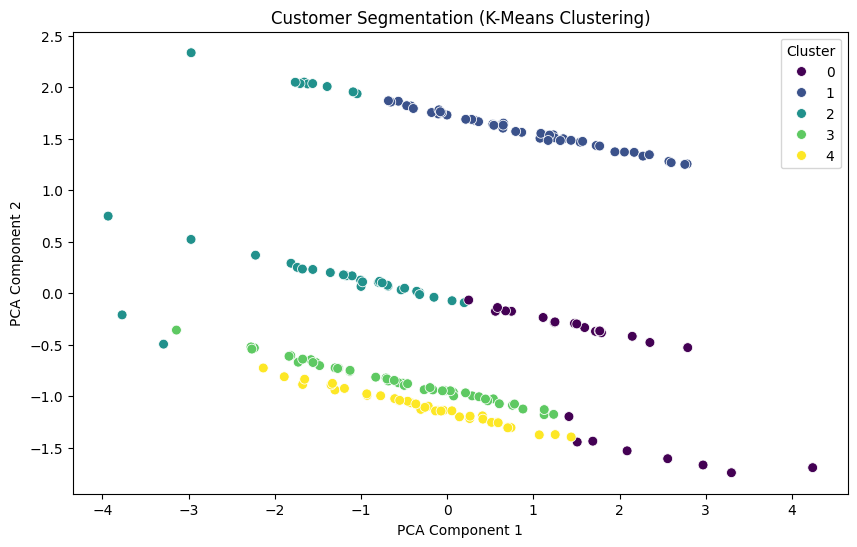

In [8]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_data["PCA1"] = pca_features[:, 0]
customer_data["PCA2"] = pca_features[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=customer_data, palette="viridis", s=50
)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [9]:
customer_data.to_csv("Customer_Clustering_Results.csv", index=False)